In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import seaborn as sns
from datetime import datetime

import models
from sqlalchemy import create_engine
import math
import matplotlib.pyplot as plt

In [4]:
engine = create_engine("sqlite:///live-db.sqlite")

In [5]:
srs = pd.read_sql_table('srs', con=engine).set_index('id')

In [6]:
tags = pd.read_sql_table('battle_tags', engine).set_index('id')

In [7]:
joined = srs.join(tags, on='battle_tag_id')

In [8]:
joined[joined.tag.str.startswith("s")]

,battle_tag_id,timestamp,value,user_id,current_sr_id,position,tag,error_count
id,,,,,,,,
19,19,2018-06-30 10:05:31.483702,844.0,19,756,0,saphirablue#21236,0
216,19,2018-07-01 13:44:02.598009,NaN,19,756,0,saphirablue#21236,0
334,19,2018-07-01 18:11:57.698461,895.0,19,756,0,saphirablue#21236,0
346,19,2018-07-02 18:15:51.346802,834.0,19,756,0,saphirablue#21236,0
428,19,2018-07-04 02:28:02.699562,783.0,19,756,0,saphirablue#21236,0
515,19,2018-07-05 00:20:37.348653,1107.0,19,756,0,saphirablue#21236,0
604,19,2018-07-06 00:46:30.699962,1569.0,19,756,0,saphirablue#21236,0
678,19,2018-07-07 04:20:42.188951,1585.0,19,756,0,saphirablue#21236,0
756,19,2018-07-07 16:20:26.971898,1585.0,19,756,0,saphirablue#21236,0


In [9]:
srs.groupby(srs.battle_tag_id).count().sort_values(by="timestamp",ascending=False)

,timestamp,value
battle_tag_id,,
65,23,22
41,19,18
98,17,17
176,17,17
90,16,16
64,15,15
53,14,14
177,11,10
175,10,10


In [10]:
bla = srs[srs.battle_tag_id==65].set_index("timestamp").value

In [11]:
sns.set()

In [12]:
#bla.plot(drawstyle="steps-post",style="r-",figsize=(8,8))

Text(0,0.5,'SR')

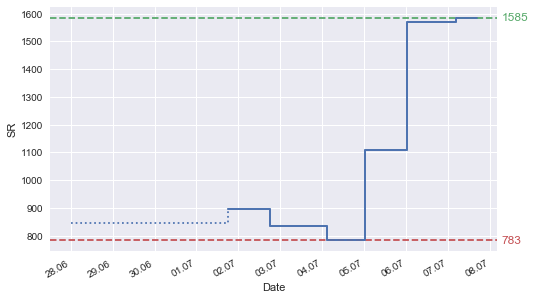

In [16]:
data = srs[srs.battle_tag_id==19]
#data = data[data.timestamp > datetime(2018,7,1)]
data = data.reset_index()
#print(data)
data.loc[0, "timestamp"] = __import__("datetime").datetime(2018,6,28)
data.loc[1, "timestamp"] = __import__("datetime").datetime(2018,6,28,0,0,1)
#data.loc[None, "timestamp"] = __import__("datetime").datetime(2018,6,28,0,0,1)
#data.loc[None, "value"] = math.nan
data = data.sort_values(by="timestamp").reset_index(drop=True)
#print(data)

fig, ax = plt.subplots()

data.set_index("timestamp").value.plot(style="C0", figsize=(8, 5), ax=ax, drawstyle="steps-post")

for is_min, ix in enumerate([data.value.idxmax(), data.value.idxmin()]):
    col = "C2" if is_min else "C1"
    angleB = 60 if is_min else -60
    
    val = data.iloc[ix].value
    ax.axhline(y=val, color=col, linestyle="--")

    ax.annotate(int(val), xy=(1, val), xycoords=("axes fraction", "data"), 
                xytext=(5,-3), textcoords="offset points",
                color=col)
    
#    ax.annotate(int(data.iloc[ix].value), xy=(data.iloc[ix].timestamp, data.iloc[ix].value), 
#                xytext=(-50, -10 if is_min else 10),
#                textcoords='offset points', 
#                arrowprops=dict(
#                    color=col, arrowstyle="-|>",
#                    connectionstyle=f"angle,angleA=0,angleB={angleB}"
#                ), 
#                color=col)

data.set_index("timestamp").value.plot(style="C0", figsize=(8, 5), ax=ax, drawstyle="steps-post")

if True:
    for ix in data.value[pd.isna].index:
        x = data.iloc[ix-1:ix]
        x = x.append(data.iloc[ix+1:ix+2])
        x.loc[0, "timestamp"] = data.iloc[ix].timestamp
        x.set_index("timestamp").value.plot(style="C0:", ax=ax, drawstyle="steps-post")

import matplotlib
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%d.%m"))
#ax.xaxis.set_major_locator(matplotlib.dates.HourLocator(byhour=(0, 12)))
plt.xlabel("Date")
plt.ylabel("SR")